
## Prediction for getting heart disease using Logistic Regression Model of Machine Learning

## 1.Getting the Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data= pd.read_csv("fragham.csv")
heart_data.head(15)
#print(str(len(heart_data.index)))

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0



# 2. Plotting the Graphs

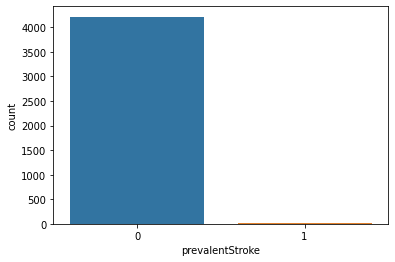

In [5]:
sns.countplot(x="prevalentStroke", data=heart_data)

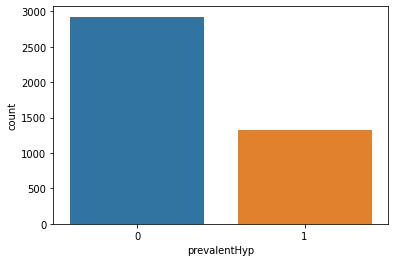

In [6]:
sns.countplot(x="prevalentHyp", data=heart_data)

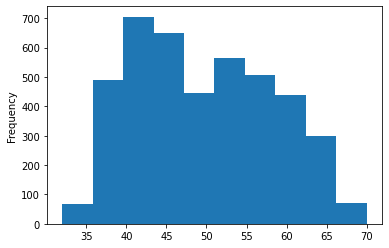

In [7]:
heart_data["age"].plot.hist()

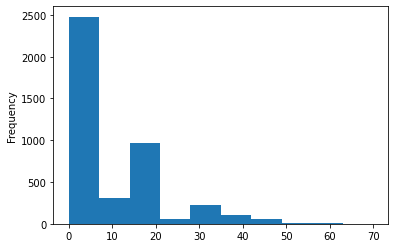

In [8]:
heart_data["cigsPerDay"].plot.hist()

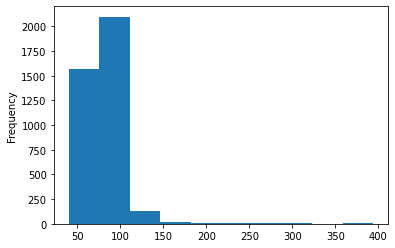

In [9]:
heart_data["glucose"].plot.hist()

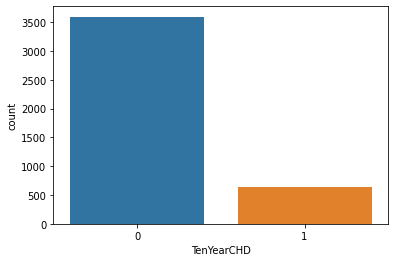

In [10]:
sns.countplot(x="TenYearCHD", data=heart_data)


## 3. Finding the Null values

In [11]:
heart_data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## 4. Plot the Heatmap

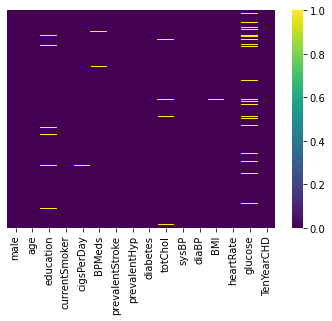

In [14]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")


## 5. Droping the values

In [15]:
heart_data.drop("education", axis=1, inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:

m=np.mean(heart_data["glucose"])
print(m)

81.96365524402907



## 6. Replacing the Null Values

In [17]:
heart_data["glucose"].replace(to_replace = np.nan, value = m, inplace=True)
heart_data["BMI"].replace(to_replace = np.nan, value = 25, inplace=True)
heart_data["cigsPerDay"].replace(to_replace = np.nan, value = 5, inplace=True)
heart_data["heartRate"].replace(to_replace = np.nan, value = 90, inplace=True)
heart_data.drop("currentSmoker", axis=1, inplace=True)

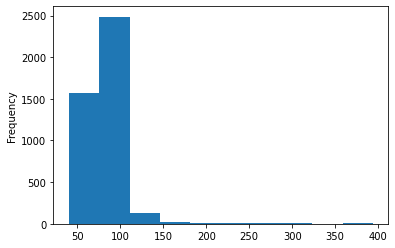

In [18]:

heart_data["glucose"].plot.hist()

In [19]:
heart_data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


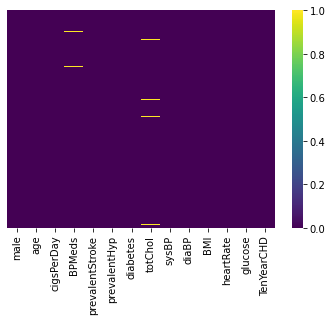

In [20]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

In [21]:
heart_data["totChol"].replace(to_replace = np.nan, value = 247.0, inplace=True)
heart_data.drop("BPMeds", axis=1, inplace=True)

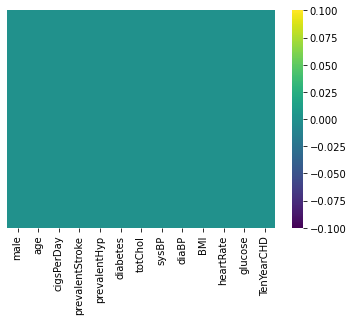

In [22]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

In [23]:
heart_data.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

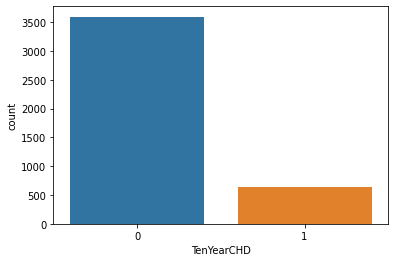

In [24]:
sns.countplot(x="TenYearCHD", data=heart_data)

In [25]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0])


## 7. Train and Test Model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8655660377358491
Precision Score : 0.7272727272727273
Recall Score : 0.06722689075630252
F1 Score : 0.12307692307692307
Confusion Matrix : 
[[726   3]
 [111   8]]


In [28]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

## 8.Accuracy Score

In [29]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8596698113207547